# Titanic Data Analysis

## Introduction
The Titanic dataset contains data about the passengers who were aboard the RMS Titanic when it sank on April 15, 1912. The dataset includes various features such as passenger class, age, sex, fare, and survival status. The goal of this analysis is to explore and visualize the dataset to understand factors that influenced survival rates.


## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [2]:
df = pd.read_csv('dataset/train.csv')

# Data Cleaning

### Initial Inspection

In [3]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
# Check rows and columns
df.shape

(891, 12)

In [5]:
# Check datatypes of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Note:** The dataset contains `891 entries` and `12 columns`, including 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', and 'Embarked'.

# Handling Missing Values

In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Note:** The `Age` and `Embarked` columns have missing values. The `Cabin` column has a high number of missing values of around `687`.

### Handling `Cabin` Column

In [7]:
# Drop the 'Cabin' column due to a high number of missing values
df = df.drop('Cabin', axis=1)

### Handling `Age` Column

**Note:** We fill `age` with mean

In [8]:
# Fill age with mean, It help us to get understanding of persons in titanic
df['Age'] = df['Age'].fillna(value = df['Age'].mean())

In [9]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

### Handling `Embarked` Column

In [10]:
df['Embarked'].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

**Note:** Now drop null values, as we only have two null values so they don't effect our dataset

In [11]:
# Drop rows with missing 'Embarked' values
df.dropna(subset=['Embarked'], inplace=True)

In [12]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


# Removing Unnecessary Columns


**Note:** As we know that PassengerId, Name and Ticket doesnot tell us whether a person survive or not, so drop them from dataset

In [13]:

def remove_columns(df, columns_to_remove):
    """
    Remove specified columns from the DataFrame if they exist.
    
    Parameters:
    df (pd.DataFrame): The DataFrame from which columns will be removed.
    columns_to_remove (list of str): List of column names to remove.
    
    Returns:
    pd.DataFrame: The DataFrame with the specified columns removed.
    """
    # List of columns to remove
    columns_to_remove = [col for col in columns_to_remove if col in df.columns]
    
    # Drop the columns if they exist
    df = df.drop(columns=columns_to_remove, axis=1)
    
    return df

In [14]:
df = remove_columns(df, ['Name', 'Fare', 'PassengerId','Fare','Ticket'])

In [15]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')

In [16]:
df.shape

(889, 7)

In [17]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S


# Data Exploration

### Descriptive Statistics

In [18]:
# Get descriptive statistics of the dataset
df.describe()

,Survived,Pclass,Age,SibSp,Parch
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.653446,0.524184,0.382452
std,0.486260,0.834700,12.968366,1.103705,0.806761
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


**Note:** This provides a summary of `numerical features in the dataset`, including `counts`, `means`, `standard deviations`, and `ranges`.

# Data Visualization

#### `Font Dicts For Different Purpose`

In [19]:
title_fontdict = {
    'fontsize': 20,
    'fontweight': 'bold',
    'family': 'serif',
    'color': 'darkblue',
    'verticalalignment': 'top'
}

xlabel_fontdict = {
    'fontsize': 14,
    'fontweight': 'medium',
    'family': 'sans-serif',
    'color': 'darkgreen',
    'horizontalalignment': 'right'
}

ylabel_fontdict = {
    'fontsize': 14,
    'fontweight': 'medium',
    'family': 'sans-serif',
    'color': 'darkred',
    'horizontalalignment': 'left'
}

ticklabel_fontdict = {
    'fontsize': 12,
    'fontweight': 'light',
    'family': 'monospace',
    'color': 'black'
}

legend_fontdict = {
    'fontsize': 12,
    'fontweight': 'normal',
    'family': 'serif',
    'color': 'purple'
}

grid_fontdict = {
    'fontsize': 10,
    'fontweight': 'light',
    'family': 'sans-serif',
    'color': 'gray'
}


## Distribution of Sex

In [20]:
g_counts = df['Sex'].value_counts()

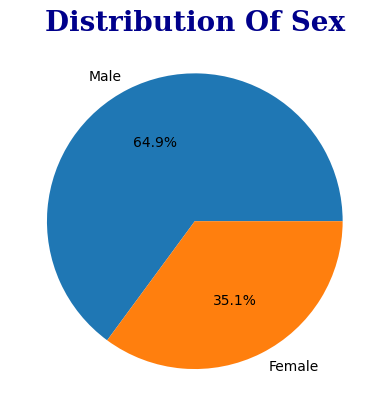

In [21]:
# Pie chart showing the distribution of male and female passengers
plt.pie(g_counts,labels=g_counts.index.str.title(), autopct='%1.1f%%')
plt.title("Distribution Of Sex", fontdict=title_fontdict)
plt.show()

**Note:** This chart illustrates the proportion of `male` and `female` passengers aboard the `Titanic`.

## Survivors by Gender

In [22]:
# Group by 'Sex' and sum 'Survived' to get the number of survivors by gender
survival_by_gender = df.groupby('Sex')['Survived'].sum()

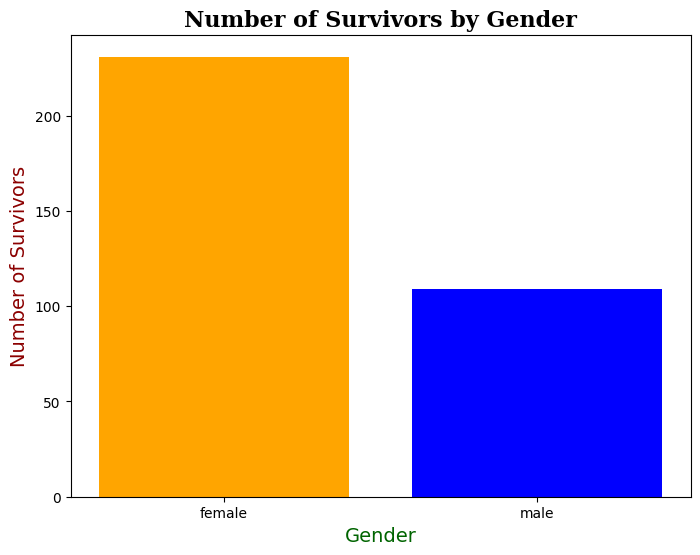

In [23]:
# Plotting
plt.figure(figsize=(8, 6))
plt.bar(survival_by_gender.index, survival_by_gender.values, color=['orange', 'blue'])

# Adding title and labels
plt.title('Number of Survivors by Gender', fontsize=16, fontweight='bold', family='serif')
plt.xlabel('Gender', fontdict=xlabel_fontdict)
plt.ylabel('Number of Survivors', fontdict=ylabel_fontdict)

# Show the plot
plt.show()

**Note:** This chart displays the number of survivors `categorized by gender`.

-----------------------

In [24]:
survival_by_gender

Sex
female    231
male      109
Name: Survived, dtype: int64

In [25]:
survival_by_gender.index

Index(['female', 'male'], dtype='object', name='Sex')

In [26]:
survival_by_gender.values

array([231, 109], dtype=int64)

---------------------------

# Survivors by Passenger Class

In [27]:
# Group by 'Pclass' and sum 'Survived' to get the number of survivors by class
pclass_survived = df.groupby('Pclass')['Survived'].sum()

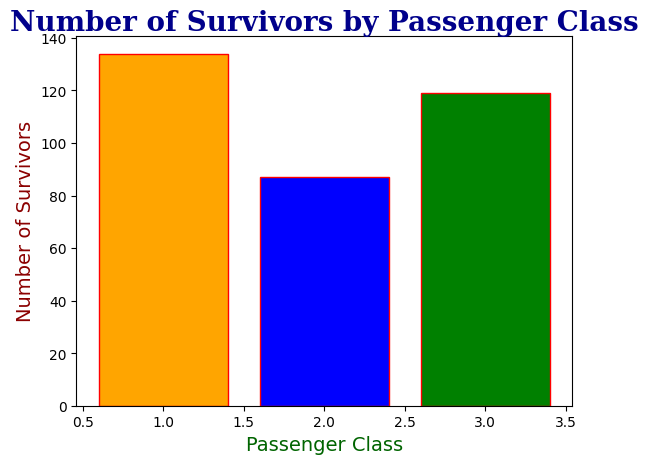

In [28]:
# Bar chart showing the number of survivors by passenger class
plt.bar(pclass_survived.index, pclass_survived.values, color=('orange','blue','green'), edgecolor='red')
plt.title("Number of Survivors by Passenger Class", fontdict=title_fontdict)
plt.xlabel("Passenger Class", fontdict=xlabel_fontdict)
plt.ylabel("Number of Survivors", fontdict=ylabel_fontdict)
plt.show()

**Note:** This chart shows the `distribution of survivors` across `different passenger classes`.

## Passenger Class Distribution by Gender

In [29]:
# Group by 'Sex' and 'Pclass', then count occurrences
pclass_gender_counts = df.groupby(['Sex', 'Pclass']).size().unstack()

<Figure size 1000x700 with 0 Axes>

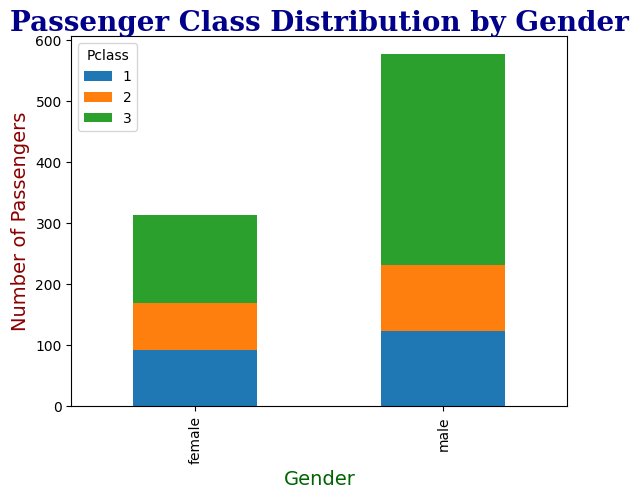

In [30]:
# Plotting
plt.figure(figsize=(10, 7))
pclass_gender_counts.plot(kind='bar', stacked=True)

# Adding title and labels
plt.title('Passenger Class Distribution by Gender', fontdict=title_fontdict)
plt.xlabel('Gender', fontdict=xlabel_fontdict)
plt.ylabel('Number of Passengers', fontdict=ylabel_fontdict)

# Show the plot
plt.show()

**Note:** This stacked bar chart illustrates the `distribution of passengers` across different classes, `separated by gender`.

------------------

In [31]:
pclass_gender_counts

Pclass,1,2,3
Sex,,,
female,92,76,144
male,122,108,347


-----------

## Survival Rate by Embarked Location

In [32]:
# Count the number of passengers by embarkation point
e_count = df['Embarked'].value_counts()

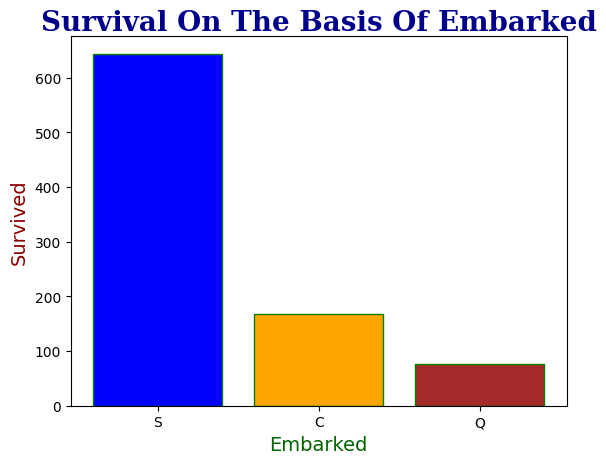

In [33]:
# Bar chart showing the number of passengers embarking at different locations
plt.bar(e_count.index, e_count.values,edgecolor='green',color=('blue','orange','brown'))
plt.title("Survival On The Basis Of Embarked", fontdict=title_fontdict)
plt.xlabel("Embarked", fontdict=xlabel_fontdict)
plt.ylabel("Survived", fontdict=ylabel_fontdict)
plt.show()

**Note:** This chart shows the `number of passengers` boarding from each `embarkation point`.

## Distribution of Siblings Aboard

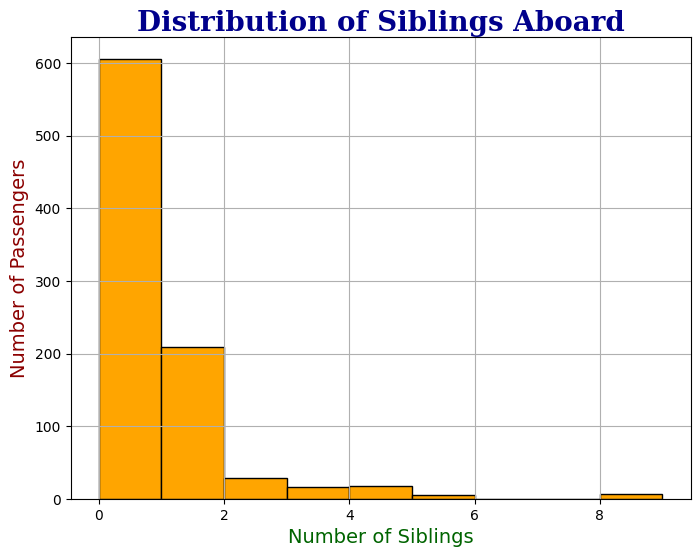

In [34]:
# Plotting histogram
plt.figure(figsize=(8, 6))
plt.hist(df['SibSp'], bins=range(df['SibSp'].min(), df['SibSp'].max() + 2), color='orange', edgecolor='black')
plt.title('Distribution of Siblings Aboard', fontdict=title_fontdict)
plt.xlabel('Number of Siblings', fontdict=xlabel_fontdict)
plt.ylabel('Number of Passengers', fontdict=ylabel_fontdict)
plt.grid(True)
plt.show()

**Note:** This histogram displays `how many siblings` each passenger had aboard.

## Average Number of Siblings by Passenger Class

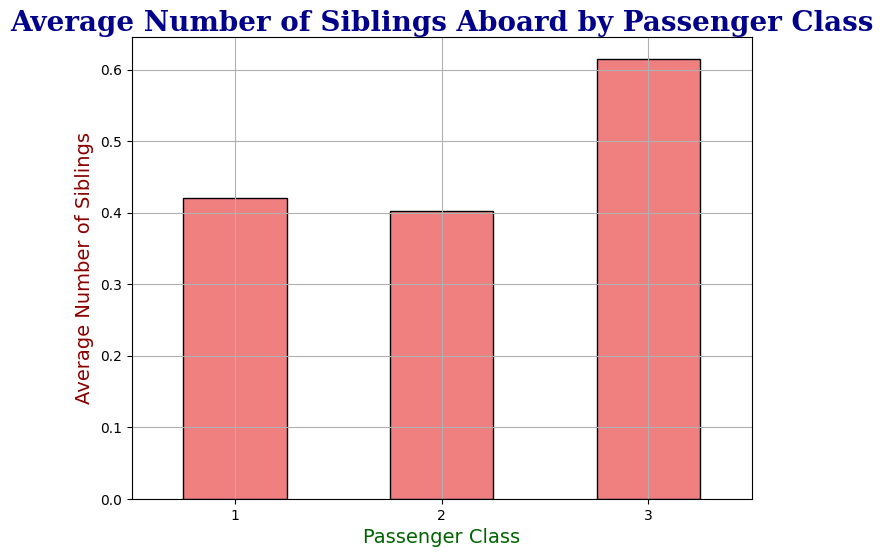

In [35]:
# Group by 'Pclass' and calculate average 'SibSp'
average_sibsp_by_pclass = df.groupby('Pclass')['SibSp'].mean()

# Plotting bar chart
plt.figure(figsize=(8, 6))
average_sibsp_by_pclass.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Average Number of Siblings Aboard by Passenger Class', fontdict=title_fontdict)
plt.xlabel('Passenger Class', fontdict=xlabel_fontdict)
plt.ylabel('Average Number of Siblings', fontdict=ylabel_fontdict)
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

**Note:** This chart shows the `average number of siblings` aboard for each passenger class.

## Siblings Aboard by Survival Status

<Figure size 800x600 with 0 Axes>

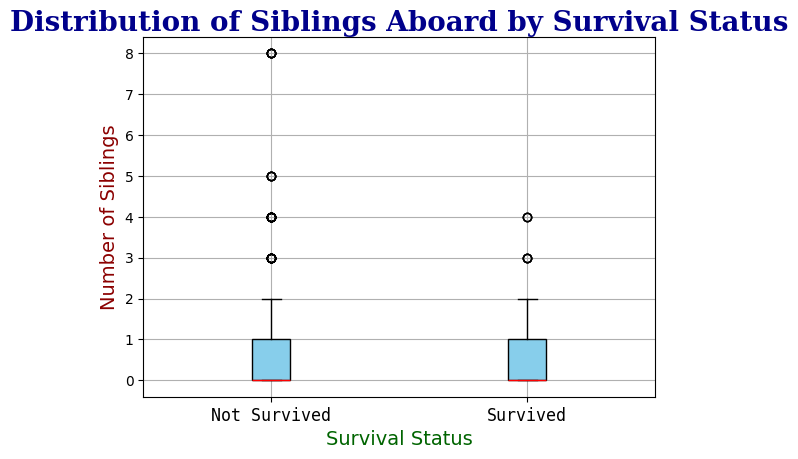

In [36]:
# Plotting box plot
plt.figure(figsize=(8, 6))
df.boxplot(column='SibSp', by='Survived', grid=False, color='darkblue', patch_artist=True,
           boxprops=dict(facecolor='skyblue', color='black'),
           whiskerprops=dict(color='black'),
           capprops=dict(color='black'),
           medianprops=dict(color='red'))
plt.title('Distribution of Siblings Aboard by Survival Status', fontdict=title_fontdict)
plt.suptitle('')  # Remove default title
plt.xlabel('Survival Status', fontdict=xlabel_fontdict)
plt.ylabel('Number of Siblings', fontdict=ylabel_fontdict)
plt.xticks([1, 2], ['Not Survived', 'Survived'], fontdict=ticklabel_fontdict)
plt.grid(True)
plt.show()

**Note:** This box plot visualizes the `distribution of siblings aboard`, comparing survivors to non-survivors.

# Fare Distribution

In [37]:
# Create a new feature for family size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [38]:
# Group by family size and calculate survival rate
family_size_survival = df.groupby('FamilySize')['Survived'].mean()

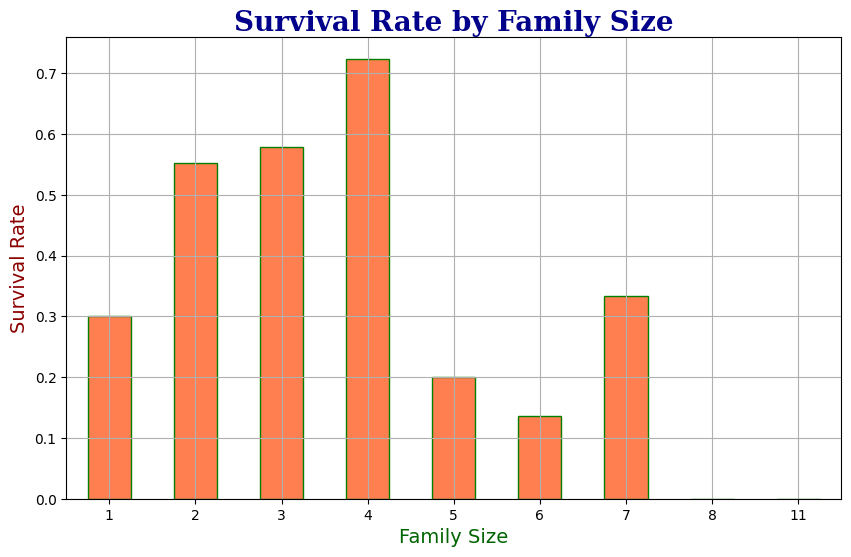

In [39]:
# Bar chart showing survival rates by family size
plt.figure(figsize=(10, 6))
family_size_survival.plot(kind='bar', color='coral', edgecolor='green')
plt.title('Survival Rate by Family Size', fontdict=title_fontdict)
plt.xlabel('Family Size', fontdict=xlabel_fontdict)
plt.ylabel('Survival Rate', fontdict=ylabel_fontdict)
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

**Note:** Examining survival rates based on family size can provide insights into the impact of having family aboard.

# Detailed Analysis of Embarked Locations

In [40]:
# Survival rate by embarkation point
embarked_survival = df.groupby('Embarked')['Survived'].mean()

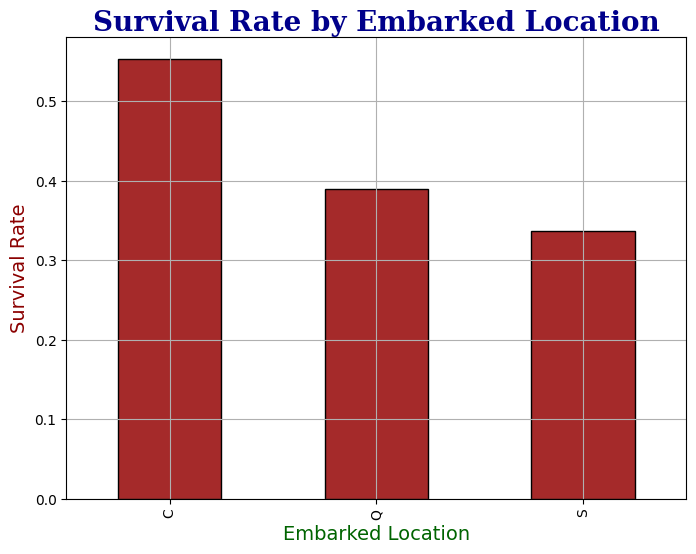

In [41]:
# Bar chart showing survival rates by embarkation point
plt.figure(figsize=(8, 6))
embarked_survival.plot(kind='bar', color='brown', edgecolor='black')
plt.title('Survival Rate by Embarked Location', fontdict=title_fontdict)
plt.xlabel('Embarked Location', fontdict=xlabel_fontdict)
plt.ylabel('Survival Rate', fontdict=ylabel_fontdict)
plt.grid(True)
plt.show()

**Note:** This analysis provides `survival rates for each embarkation point`, giving additional context to `previous charts`.

# Survival by Parch and SibSp

In [42]:
# Group by 'Parch' and 'SibSp' and calculate survival rates
parch_sibsp_survival = df.groupby(['Parch', 'SibSp'])['Survived'].mean().unstack()

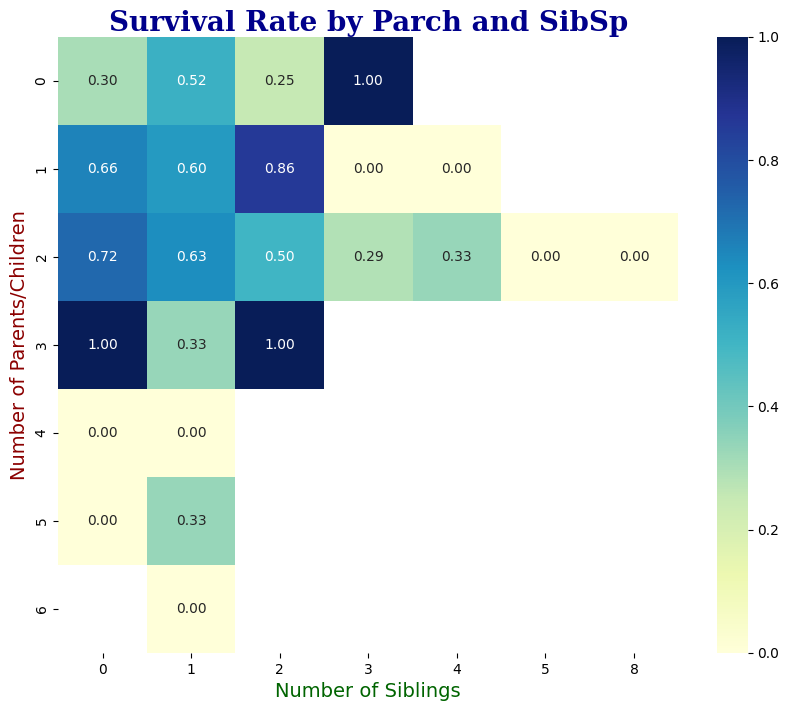

In [43]:
# Heatmap showing survival rates by number of parents/children and siblings/spouses
plt.figure(figsize=(10, 8))
sns.heatmap(parch_sibsp_survival, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Survival Rate by Parch and SibSp', fontdict=title_fontdict)
plt.xlabel('Number of Siblings', fontdict=xlabel_fontdict)
plt.ylabel('Number of Parents/Children', fontdict=ylabel_fontdict)
plt.show()

**Note:** This heatmap provides a detailed view of how `survival rates` vary with the number of `parents/children` and `siblings/spouses`.

# Survival Rate by Parch

In [44]:
# Group by 'Parch' and calculate survival rate
parch_survival = df.groupby('Parch')['Survived'].mean()

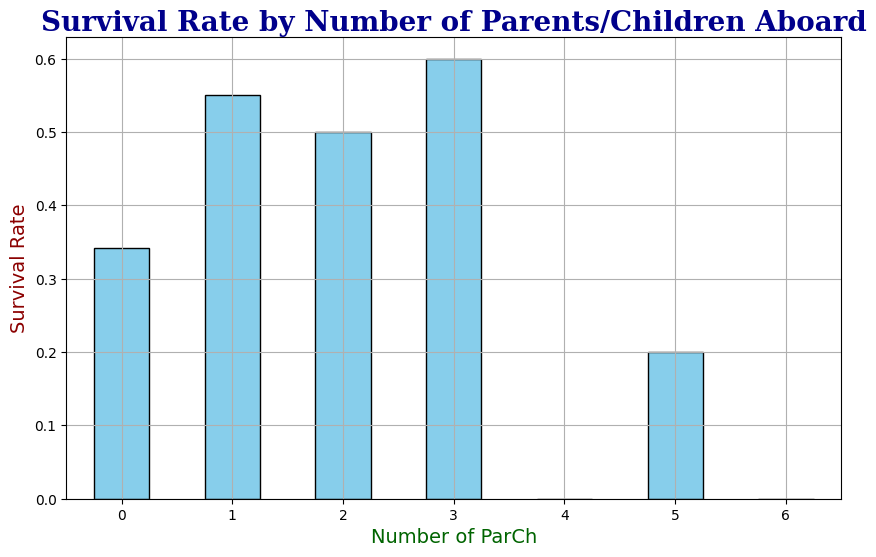

In [45]:
# Plotting bar chart for survival rates by 'Parch'
plt.figure(figsize=(10, 6))
parch_survival.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Survival Rate by Number of Parents/Children Aboard', fontdict=title_fontdict)
plt.xlabel('Number of ParCh', fontdict=xlabel_fontdict)
plt.ylabel('Survival Rate', fontdict=ylabel_fontdict)
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

**Note:** This bar chart shows how the `survival rate changes` with the `number of parents or children` aboard.

# Summary and Conclusion

In this analysis, we explored the Titanic dataset to understand various factors affecting survival rates. Key findings include:

* The majority of passengers were male.
* Female passengers had a higher survival rate compared to male passengers.
* Passengers in higher classes had better survival rates.
* Passengers embarking from locations C ,Q and S had distinct patterns in terms of survival.

### Import Libraries For Machine Learning

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [47]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,FamilySize
0,0,3,male,22.0,1,0,S,2
1,1,1,female,38.0,1,0,C,2
2,1,3,female,26.0,0,0,S,1
3,1,1,female,35.0,1,0,S,2
4,0,3,male,35.0,0,0,S,1


#### Create function for dataset to perform operation
- For the sex column, we set a value of 0 if the passenger is male and 1 if the passenger is female.- 
We use the mean value to fill the missing data in the age columns- 

We use one-hot encoding for the Pcla- s.

We’ll only select six features from our DataFrame.

In [48]:
def manipulate_df(df):
    # Update sex column to numerical
    df['Sex'] = df['Sex'].map(lambda x: 0 if x == 'male' else 1)
    # Create a first class column
    df['FirstClass'] = df['Pclass'].map(lambda x: 1 if x == 1 else 0)
    # Create a second class column
    df['SecondClass'] = df['Pclass'].map(lambda x: 1 if x == 2 else 0)
    # Create a second class column
    df['ThirdClass'] = df['Pclass'].map(lambda x: 1 if x == 3 else 0)
    # Select the desired features
    df= df[['Sex' , 'Age' , 'FirstClass', 'SecondClass' ,'ThirdClass' , 'Survived']]
    return df

#### Apply function on our dataset

In [49]:
manipulated_df = manipulate_df(df)

### Train-test split
- We’ll split the dataset into two parts, 70% of it for training and the remaining 30% for testing.

In [50]:
features= df[['Sex' , 'Age' , 'FirstClass', 'SecondClass','ThirdClass']] # Another way of doing this is df.drop("Survived")
survival = df['Survived']
# Here features is X value and survival is target attribute or y value

In [51]:
X_train , X_test , y_train , y_test = train_test_split(features , survival ,test_size = 0.3)

#### Scale the date

In [52]:
scaler = StandardScaler()
train_features = scaler.fit_transform(X_train)
test_features = scaler.transform(X_test)

In [53]:
print(test_features)

[[-0.73198529 -1.41992363 -0.55878107 -0.50902781  0.89313373]
 [-0.73198529  0.22312087 -0.55878107  1.96452921 -1.11965316]
 [-0.73198529  0.45784151 -0.55878107 -0.50902781  0.89313373]
 ...
 [-0.73198529 -2.04584535 -0.55878107  1.96452921 -1.11965316]
 [-0.73198529 -1.57640406 -0.55878107 -0.50902781  0.89313373]
 [ 1.36614767 -1.18520299  1.78960965 -0.50902781 -1.11965316]]


### Build the model#
Let’s train the model and predict the results.

In [54]:
# Create and train the model
model = LogisticRegression() # We initilize the instance of LogisticRegression class
model.fit(train_features , y_train) # train the model

LogisticRegression()

In [55]:
train_score = model.score(train_features,y_train)
test_score = model.score(test_features,y_test)
y_predict = model.predict(test_features) 
# We get score on training data, testing data and then we get prediction

In [56]:
print("Training Score: ",train_score)
print("Testing Score: ",test_score)

Training Score:  0.792604501607717
Testing Score:  0.8089887640449438


### Model performance#


In [57]:
confusion = confusion_matrix(y_test, y_predict)
FN = confusion[1][0]
TN = confusion[0][0]
TP = confusion[1][1]
FP = confusion[0][1]

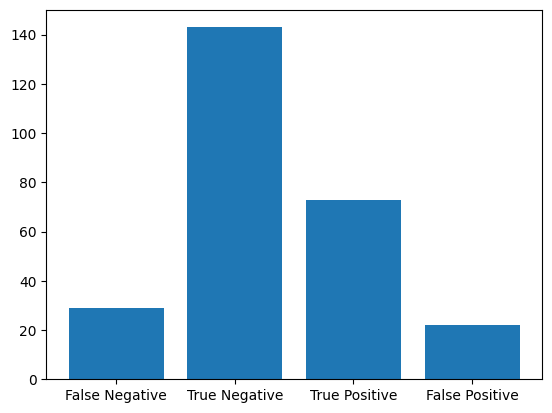

In [58]:
plt.bar(['False Negative' , 'True Negative' , 'True Positive' , 'False Positive'],[FN,TN,TP,FP])
plt.show()

### Save the model

In [60]:
import os
import joblib

In [61]:
os.makedirs('model', exist_ok=True)

In [62]:
# Save the model
joblib.dump(model, 'model/t_model.keras')

['model/t_model.keras']